# Graphs

## Line Graph: Designite Design Smells, Architecture Smells Vs New Code and Rework

### Note: New Heuristics Need to be defined for Design and Architecture Level

In [2]:
import pandas as pd

dataset = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\main_data_with_code_design_arch_smells_10th.csv')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 4]

In [4]:
# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values

#Smells
code_smells = min_max_scaling(dataset['code_smells'])
design_smells = min_max_scaling(dataset['design_smells'])
architecture_smells = min_max_scaling(dataset['architecture_smells'])

# Smell diffs
design_smell_diff = min_max_scaling(dataset['code_smells_diff'])
architecture_smells = min_max_scaling(dataset['design_smell_diff'])
architecture_smell_diff = min_max_scaling(dataset['architecture_smell_diff'])

#loc
added_lines = min_max_scaling(dataset['added_lines'])
deleted_lines = min_max_scaling(dataset['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
new_code = min_max_scaling(dataset['added_lines'] - dataset['deleted_lines'])

new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
scaled_new_code_divided_by_rework = min_max_scaling(new_code_divided_by_rework)

## Design Smells

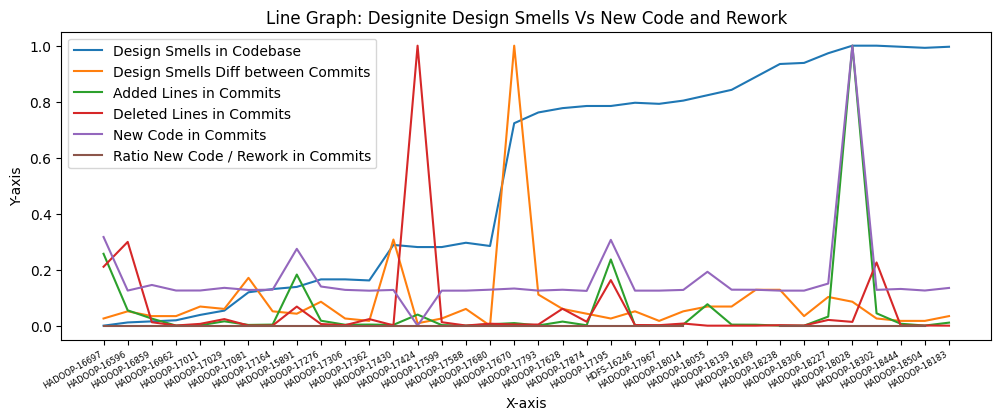

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 4]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values
design_smell_diff = min_max_scaling(dataset['design_smell_diff'])
design_smells = min_max_scaling(dataset['design_smells'])
added_lines = min_max_scaling(dataset['added_lines'])
deleted_lines = min_max_scaling(dataset['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
new_code = min_max_scaling(dataset['added_lines'] - dataset['deleted_lines'])
new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
scaled_new_code_divided_by_rework = min_max_scaling(new_code_divided_by_rework)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph

ax.plot(dataset['jira issue key'], design_smells)
ax.plot(dataset['jira issue key'], design_smell_diff)
ax.plot(dataset['jira issue key'], added_lines)
ax.plot(dataset['jira issue key'], deleted_lines)
ax.plot(dataset['jira issue key'], new_code)
ax.plot(dataset['jira issue key'], scaled_new_code_divided_by_rework)

# Add labels to lines
ax.legend(['Design Smells in Codebase', 'Design Smells Diff between Commits', 'Added Lines in Commits', 'Deleted Lines in Commits', 'New Code in Commits', 'Ratio New Code / Rework in Commits'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph: Designite Design Smells Vs New Code and Rework')

# Display the graph
plt.show()


## Statistical Tests
### Pearson Correlation: Designite Design Smells Vs New Code and Rework

In [36]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and its p-value
corr1, p1 = pearsonr(design_smells, added_lines)
corr2, p2 = pearsonr(design_smells, deleted_lines)
corr3, p3 = pearsonr(design_smells, new_code)
#corr4, p4 = pearsonr(design_smells, scaled_new_code_divided_by_rework)

#repeat above for design_smell_diffs
corr5, p5 = pearsonr(design_smell_diff, added_lines)
corr6, p6 = pearsonr(design_smell_diff, deleted_lines)
corr7, p7 = pearsonr(design_smell_diff, new_code)
#corr8, p8 = pearsonr(design_smell_diff, scaled_new_code_divided_by_rework)

# Print the results
print(f'Pearson correlation coefficient between code smells and added lines: {corr1:.2f}, p-value: {p1:.2f}')
print(f'Pearson correlation coefficient between code smells and deleted lines: {corr2:.2f}, p-value: {p2:.2f}')
print(f'Pearson correlation coefficient between code smells and new code: {corr3:.2f}, p-value: {p3:.2f}')
#print(f'Pearson correlation coefficient between code smells and new code / rework: {corr4:.2f}, p-value: {p4:.2f}')

print(f'Pearson correlation coefficient between code smells diff and added lines: {corr5:.2f}, p-value: {p5:.2f}')
print(f'Pearson correlation coefficient between code smells diff and deleted lines: {corr6:.2f}, p-value: {p6:.2f}')
print(f'Pearson correlation coefficient between code smells diff and new code: {corr7:.2f}, p-value: {p7:.2f}')
#print(f'Pearson correlation coefficient between code smells diff and new code / rework: {corr8:.2f}, p-value: {p8:.2f}')


Pearson correlation coefficient between code smells and added lines: 0.14, p-value: 0.42
Pearson correlation coefficient between code smells and deleted lines: -0.17, p-value: 0.34
Pearson correlation coefficient between code smells and new code: 0.17, p-value: 0.32
Pearson correlation coefficient between code smells diff and added lines: -0.04, p-value: 0.80
Pearson correlation coefficient between code smells diff and deleted lines: -0.13, p-value: 0.45
Pearson correlation coefficient between code smells diff and new code: -0.02, p-value: 0.91


## Architecture Smells

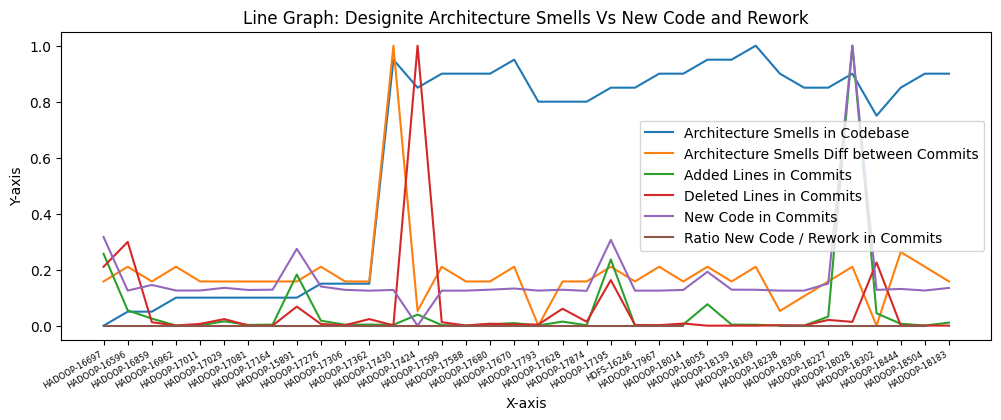

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 4]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values
architecture_smell_diff = min_max_scaling(dataset['architecture_smell_diff'])
architecture_smells = min_max_scaling(dataset['architecture_smells'])
added_lines = min_max_scaling(dataset['added_lines'])
deleted_lines = min_max_scaling(dataset['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
new_code = min_max_scaling(dataset['added_lines'] - dataset['deleted_lines'])
new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
scaled_new_code_divided_by_rework = min_max_scaling(new_code_divided_by_rework)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph

ax.plot(dataset['jira issue key'], architecture_smells)
ax.plot(dataset['jira issue key'], architecture_smell_diff)
ax.plot(dataset['jira issue key'], added_lines)
ax.plot(dataset['jira issue key'], deleted_lines)
ax.plot(dataset['jira issue key'], new_code)
ax.plot(dataset['jira issue key'], scaled_new_code_divided_by_rework)

# Add labels to lines
ax.legend(['Architecture Smells in Codebase', 'Architecture Smells Diff between Commits', 'Added Lines in Commits', 'Deleted Lines in Commits', 'New Code in Commits', 'Ratio New Code / Rework in Commits'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph: Designite Architecture Smells Vs New Code and Rework')

# Display the graph
plt.show()


## Statistical Tests
### Pearson Correlation: Designite Architecture Smells Vs New Code and Rework

In [35]:
from scipy.stats import pearsonr
import numpy as np

# Calculate the Pearson correlation coefficient and its p-value
corr1, p1 = pearsonr(architecture_smells, added_lines)
corr2, p2 = pearsonr(architecture_smells, deleted_lines)
corr3, p3 = pearsonr(architecture_smells, new_code)
#corr4, p4 = pearsonr(architecture_smells, new_code_divided_by_rework)          

#repeat above for arch_smell_diffs
corr5, p5 = pearsonr(architecture_smell_diff, added_lines)
corr6, p6 = pearsonr(architecture_smell_diff, deleted_lines)
corr7, p7 = pearsonr(architecture_smell_diff, new_code)
#corr8, p8 = pearsonr(architecture_smell_diff, scaled_new_code_divided_by_rework)

# Print the results
print(f'Pearson correlation coefficient between code smells and added lines: {corr1:.2f}, p-value: {p1:.2f}')
print(f'Pearson correlation coefficient between code smells and deleted lines: {corr2:.2f}, p-value: {p2:.2f}')
print(f'Pearson correlation coefficient between code smells and new code: {corr3:.2f}, p-value: {p3:.2f}')
#print(f'Pearson correlation coefficient between code smells and new code / rework: {corr4:.2f}, p-value: {p4:.2f}')

print(f'Pearson correlation coefficient between code smells diff and added lines: {corr5:.2f}, p-value: {p5:.2f}')
print(f'Pearson correlation coefficient between code smells diff and deleted lines: {corr6:.2f}, p-value: {p6:.2f}')
print(f'Pearson correlation coefficient between code smells diff and new code: {corr7:.2f}, p-value: {p7:.2f}')
#print(f'Pearson correlation coefficient between code smells diff and new code / rework: {corr8:.2f}, p-value: {p8:.2f}')


Pearson correlation coefficient between code smells and added lines: 0.03, p-value: 0.85
Pearson correlation coefficient between code smells and deleted lines: -0.02, p-value: 0.92
Pearson correlation coefficient between code smells and new code: 0.04, p-value: 0.83
Pearson correlation coefficient between code smells diff and added lines: 0.01, p-value: 0.94
Pearson correlation coefficient between code smells diff and deleted lines: -0.18, p-value: 0.28
Pearson correlation coefficient between code smells diff and new code: 0.05, p-value: 0.79


# Histograms

A histogram is a graphical representation of the distribution of a continuous variable. It shows how the data are spread out over a range of values, and how frequently each value occurs.

A histogram provides the following information about the data:

The shape of the distribution: The shape of the histogram can tell you whether the data are normally distributed (bell-shaped), skewed to the left or right, or have multiple peaks.

The center of the distribution: The center of the distribution can be estimated by identifying the peak of the histogram.

The spread of the distribution: The spread of the distribution can be estimated by looking at the width of the histogram. A wider histogram indicates a larger spread of the data.

The presence of outliers: Outliers are data points that are significantly different from the majority of the data. They can be identified by looking for bars that are much higher or lower than the other bars in the histogram.

The frequency of the data: The height of each bar in the histogram represents the frequency of the data that falls within that bin. By looking at the height of the bars, you can see which values occur more frequently in the data.

Overall, a histogram is a useful tool for visualizing and exploring the distribution of a continuous variable. It can help you to understand the shape, center, spread, and outliers of the data, and to identify any patterns or trends in the data that may not be immediately obvious from summary statistics.

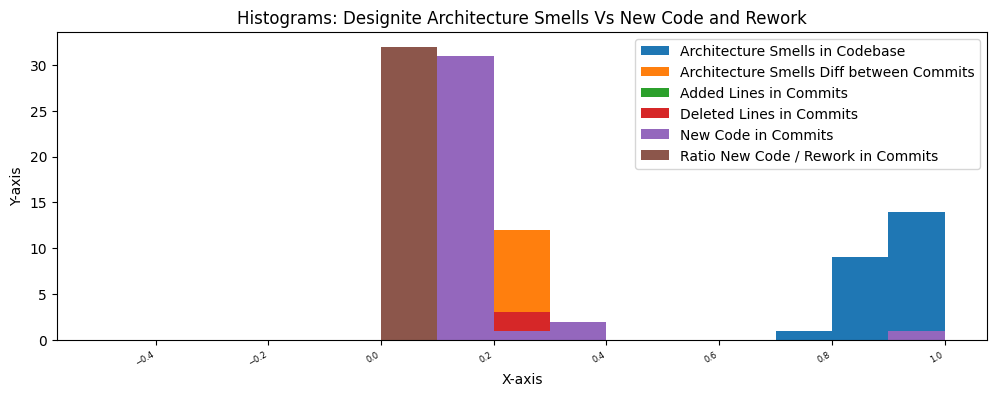

In [50]:
#plot histograms for all continuous variables encountered in the code above
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 4]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values
architecture_smell_diff = min_max_scaling(dataset['architecture_smell_diff'])
architecture_smells = min_max_scaling(dataset['architecture_smells'])
added_lines = min_max_scaling(dataset['added_lines'])
deleted_lines = min_max_scaling(dataset['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
new_code = min_max_scaling(dataset['added_lines'] - dataset['deleted_lines'])
new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
scaled_new_code_divided_by_rework = min_max_scaling(new_code_divided_by_rework)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a histogram

ax.hist(architecture_smells)
ax.hist(architecture_smell_diff)
ax.hist(added_lines)
ax.hist(deleted_lines)
ax.hist(new_code)
ax.hist(scaled_new_code_divided_by_rework)

# Add labels to lines
ax.legend(['Architecture Smells in Codebase', 'Architecture Smells Diff between Commits', 'Added Lines in Commits', 'Deleted Lines in Commits', 'New Code in Commits', 'Ratio New Code / Rework in Commits'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Histograms: Designite Architecture Smells Vs New Code and Rework')

# Display the graph
plt.show()

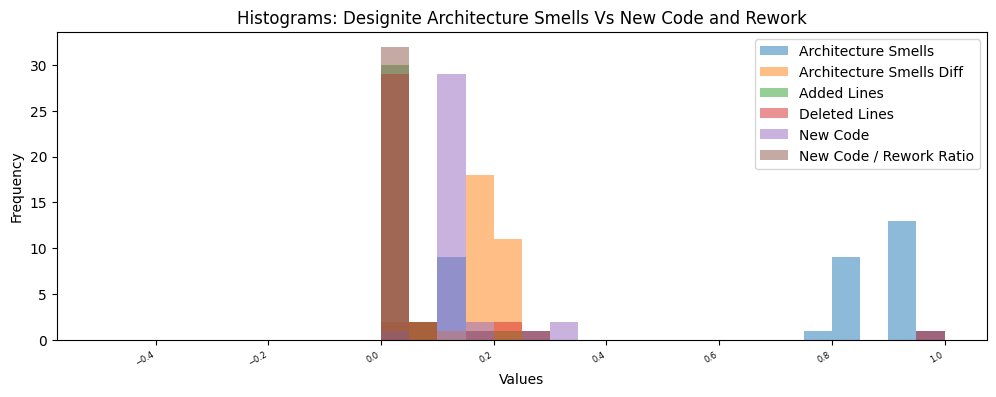

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 4]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values
architecture_smell_diff = min_max_scaling(dataset['architecture_smell_diff'])
architecture_smells = min_max_scaling(dataset['architecture_smells'])
added_lines = min_max_scaling(dataset['added_lines'])
deleted_lines = min_max_scaling(dataset['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
new_code = min_max_scaling(dataset['added_lines'] - dataset['deleted_lines'])
new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
scaled_new_code_divided_by_rework = min_max_scaling(new_code_divided_by_rework)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a histogram
ax.hist(architecture_smells, bins=20, alpha=0.5, label='Architecture Smells')
ax.hist(architecture_smell_diff, bins=20, alpha=0.5, label='Architecture Smells Diff')
ax.hist(added_lines, bins=20, alpha=0.5, label='Added Lines')
ax.hist(deleted_lines, bins=20, alpha=0.5, label='Deleted Lines')
ax.hist(new_code, bins=20, alpha=0.5, label='New Code')
ax.hist(scaled_new_code_divided_by_rework, bins=20, alpha=0.5, label='New Code / Rework Ratio')

# Add axis labels and a title
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Histograms: Designite Architecture Smells Vs New Code and Rework')

# Add a legend
ax.legend(loc='upper right')

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Display the graph
plt.show()


# Shapiro-Wilk test 
### To determine if the data is normally distributed
For all variables

The Shapiro-Wilk test is commonly used for small to medium-sized datasets, while the Anderson-Darling test is more appropriate for larger datasets.
Both tests compare the data to what would be expected from a normal distribution and provide a p-value. 
If the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis that the data is normally distributed.

Note: Shapiro-Wilk test is not the only method for testing normality, and that it may not always be the most appropriate method depending on the characteristics of the data. Other tests for normality include the Anderson-Darling test, the Kolmogorov-Smirnov test, and the Lilliefors test.

In [63]:
#Perform Shapiro-Wilk test for normality
from scipy.stats import shapiro


# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Define the Shapiro-Wilk test function
def shapiro_wilk_test(values):
    stat, p = shapiro(values)
    print(f'Statistic={stat:.2f}, p-value={p:.2f}')
    if p > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

# Perform the Shapiro-Wilk test
print('Shapiro-Wilk test for normality of code smells in codebase:')
shapiro_wilk_test(min_max_scaling(dataset['code_smells']))
print('Shapiro-Wilk test for normality of design smells in codebase:')
shapiro_wilk_test(min_max_scaling(dataset['design_smells']))
print('Shapiro-Wilk test for normality of architecture smells in codebase:')
shapiro_wilk_test(min_max_scaling(dataset['architecture_smells']))
print('Shapiro-Wilk test for normality of architecture smells diff between commits:')
shapiro_wilk_test(min_max_scaling(dataset['code_smells_diff']))
print('Shapiro-Wilk test for normality of architecture smells diff between commits:')
shapiro_wilk_test(min_max_scaling(dataset['design_smell_diff']))
print('Shapiro-Wilk test for normality of architecture smells diff between commits:')
shapiro_wilk_test(min_max_scaling(dataset['architecture_smell_diff']))
print('Shapiro-Wilk test for normality of added lines in commits:')
shapiro_wilk_test(min_max_scaling(dataset['added_lines']))
print('Shapiro-Wilk test for normality of deleted lines in commits:')
shapiro_wilk_test(min_max_scaling(dataset['deleted_lines']))
print('Shapiro-Wilk test for normality of new code in commits:')
shapiro_wilk_test(new_code)
print('Shapiro-Wilk test for normality of new code / rework ratio in commits:')
shapiro_wilk_test(scaled_new_code_divided_by_rework)


Shapiro-Wilk test for normality of code smells in codebase:
Statistic=0.66, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of design smells in codebase:
Statistic=0.84, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of architecture smells in codebase:
Statistic=0.72, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of architecture smells diff between commits:
Statistic=0.26, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of architecture smells diff between commits:
Statistic=0.40, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of architecture smells diff between commits:
Statistic=0.46, p-value=0.00
Data does not look normally distributed (reject H0)
Shapiro-Wilk test for normality of added lines in commits:
Statistic=0.35, p-value=0.00
Data 

| Test Name | Statistic | p-value | Normality |
| --------- | --------- | ------- | --------- |
| Code Smells in Codebase | 0.66 | 0.00 | Not Normal |
| Design Smells in Codebase | 0.84 | 0.00 | Not Normal |
| Architecture Smells in Codebase | 0.72 | 0.00 | Not Normal |
| Code Smells Diff Between Commits | 0.26 | 0.00 | Not Normal |
| Design Smells Diff Between Commits | 0.40 | 0.00 | Not Normal |
| Architecture Smells Diff Between Commits | 0.46 | 0.00 | Not Normal |
| Added Lines in Commits | 0.35 | 0.00 | Not Normal |
| Deleted Lines in Commits | 0.38 | 0.00 | Not Normal |
| New Code in Commits | 0.37 | 0.00 | Not Normal |
| New Code / Rework Ratio | N/A | 1.00 | Normal |



# Gussian (Normal) Distributions

A Gaussian, also known as a normal distribution, is a probability distribution that is commonly used in statistical analysis. It is a continuous distribution that has a bell-shaped curve and is characterized by two parameters: the mean and the standard deviation. The mean represents the center of the distribution, and the standard deviation controls the spread or width of the curve.

In a normal distribution, approximately 68% of the data falls within one standard deviation of the mean, approximately 95% of the data falls within two standard deviations of the mean, and approximately 99.7% of the data falls within three standard deviations of the mean. This makes the normal distribution a useful tool for modeling real-world phenomena that exhibit a range of values.

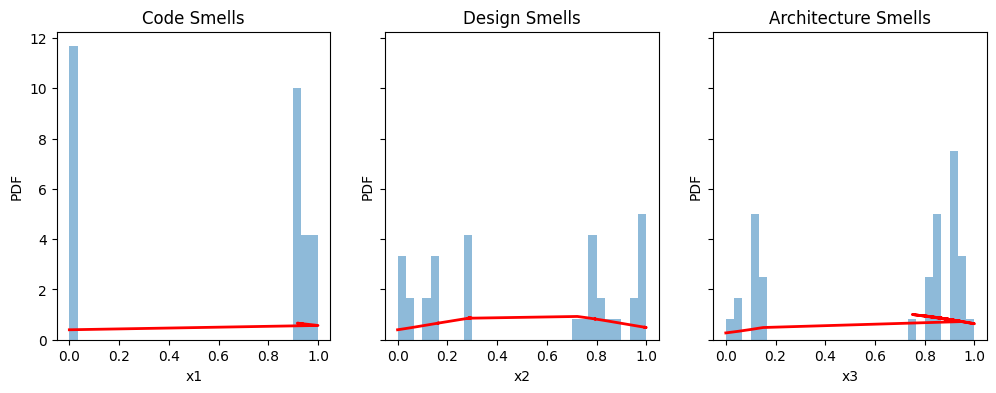

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#create 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values
x1 = min_max_scaling(dataset['code_smells'])
x2 = min_max_scaling(dataset['design_smells'])
x3 = min_max_scaling(dataset['architecture_smells'])

# calculate the PDF of the Gaussian distribution for x
pdf_x1 = norm.pdf(x1, np.mean(x1), np.std(x1))
pdf_x2 = norm.pdf(x2, np.mean(x2), np.std(x2))
pdf_x3 = norm.pdf(x3, np.mean(x3), np.std(x3))

# plot the PDF of the Gaussian distribution for x1, x2, x3
ax1.hist(x1, density=True, alpha=0.5, bins=30)
ax1.plot(x1, pdf_x1, 'r', linewidth=2)
ax1.set_xlabel('x1')
ax1.set_ylabel('PDF')
ax1.set_title('Code Smells')

ax2.hist(x2, density=True, alpha=0.5, bins=30)
ax2.plot(x2, pdf_x2, 'r', linewidth=2)
ax2.set_xlabel('x2')
ax2.set_ylabel('PDF')
ax2.set_title('Design Smells')

ax3.hist(x3, density=True, alpha=0.5, bins=30)
ax3.plot(x3, pdf_x3, 'r', linewidth=2)
ax3.set_xlabel('x3')
ax3.set_ylabel('PDF')
ax3.set_title('Architecture Smells')

plt.show()

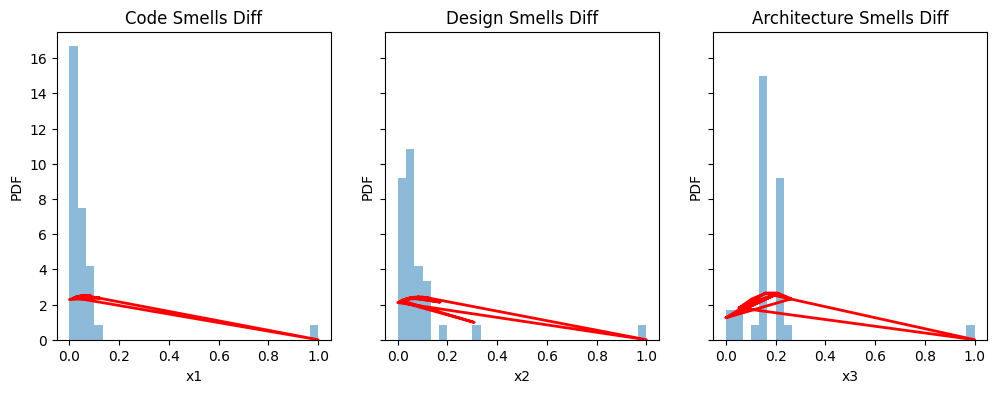

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

plt.rcParams['figure.figsize'] = [12, 4]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values
x1 = min_max_scaling(dataset['code_smells_diff'])
x2 = min_max_scaling(dataset['design_smell_diff'])
x3 = min_max_scaling(dataset['architecture_smell_diff'])

# calculate the PDF of the Gaussian distribution for x
pdf_x1 = norm.pdf(x1, np.mean(x1), np.std(x1))
pdf_x2 = norm.pdf(x2, np.mean(x2), np.std(x2))
pdf_x3 = norm.pdf(x3, np.mean(x3), np.std(x3))

# plot the PDF of the Gaussian distribution for x1, x2, x3
ax1.hist(x1, density=True, alpha=0.5, bins=30)
ax1.plot(x1, pdf_x1, 'r', linewidth=2)
ax1.set_xlabel('x1')
ax1.set_ylabel('PDF')
ax1.set_title('Code Smells Diff')

ax2.hist(x2, density=True, alpha=0.5, bins=30)
ax2.plot(x2, pdf_x2, 'r', linewidth=2)
ax2.set_xlabel('x2')
ax2.set_ylabel('PDF')
ax2.set_title('Design Smells Diff')

ax3.hist(x3, density=True, alpha=0.5, bins=30)
ax3.plot(x3, pdf_x3, 'r', linewidth=2)
ax3.set_xlabel('x3')
ax3.set_ylabel('PDF')
ax3.set_title('Architecture Smells Diff')

plt.show()

c:\CodeBook\new_code_rework_TD\new_code_rework_TD\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


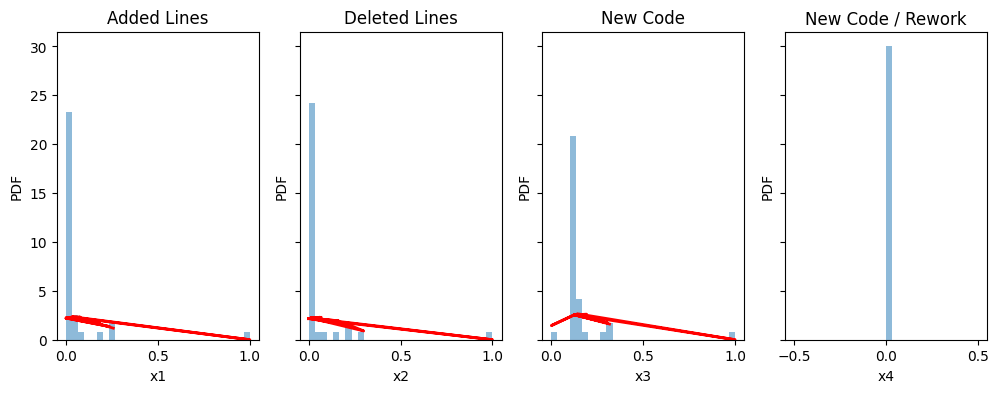

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#create 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values

x1 = min_max_scaling(dataset['added_lines'])
x2 = min_max_scaling(dataset['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
x3 = new_code = min_max_scaling(dataset['added_lines'] - dataset['deleted_lines'])
new_code_divided_by_rework = (dataset['added_lines'] - dataset['deleted_lines']) / dataset['deleted_lines']
x4 = scaled_new_code_divided_by_rework = min_max_scaling(new_code_divided_by_rework)

# calculate the PDF of the Gaussian distribution for x
pdf_x1 = norm.pdf(x1, np.mean(x1), np.std(x1))
pdf_x2 = norm.pdf(x2, np.mean(x2), np.std(x2))
pdf_x3 = norm.pdf(x3, np.mean(x3), np.std(x3))
pdf_x4 = norm.pdf(x4, np.mean(x4), np.std(x4))

# plot the PDF of the Gaussian distribution for x1, x2, x3
ax1.hist(x1, density=True, alpha=0.5, bins=30)
ax1.plot(x1, pdf_x1, 'r', linewidth=2)
ax1.set_xlabel('x1')
ax1.set_ylabel('PDF')
ax1.set_title('Added Lines')

ax2.hist(x2, density=True, alpha=0.5, bins=30)
ax2.plot(x2, pdf_x2, 'r', linewidth=2)
ax2.set_xlabel('x2')
ax2.set_ylabel('PDF')
ax2.set_title('Deleted Lines')

ax3.hist(x3, density=True, alpha=0.5, bins=30)
ax3.plot(x3, pdf_x3, 'r', linewidth=2)
ax3.set_xlabel('x3')
ax3.set_ylabel('PDF')
ax3.set_title('New Code')

ax4.hist(x4, density=True, alpha=0.5, bins=30)
ax4.plot(x4, pdf_x4, 'r', linewidth=2)
ax4.set_xlabel('x4')
ax4.set_ylabel('PDF')
ax4.set_title('New Code / Rework')

plt.show()

# Statistical tests for not normally distributed data

When dealing with non-normally distributed data, there are several statistical tests that you can use to analyze the relationship between variables:

* Spearman's Rank Correlation: This is a non-parametric test that assesses the strength and direction of the monotonic relationship between two variables. It does not assume that the variables are normally distributed and is suitable for ordinal and continuous data.

* Kendall's Tau Correlation: Similar to Spearman's rank correlation, Kendall's Tau correlation coefficient also measures the strength and direction of the monotonic relationship between two variables. It is also non-parametric and can be used for ordinal and continuous data.

* Kruskal-Wallis Test: This test is a non-parametric alternative to the one-way ANOVA test and can be used to compare three or more groups of non-normally distributed data.

* Mann-Whitney U Test: This is a non-parametric alternative to the independent samples t-test, used to compare two independent groups of non-normally distributed data.

* Wilcoxon Signed-Rank Test: This is a non-parametric alternative to the paired samples t-test, used to compare two dependent groups of non-normally distributed data.

These tests are just some examples of the statistical methods that can be used with non-normally distributed data. The choice of test depends on the research question and the type of data being analyzed.

In [10]:
%pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Pearson correlations between the variables
dataset.corr(method='pearson')

#Spearman correlations between the variables
dataset.corr(method='spearman')